In [1]:
import sys
import os
from dotenv import load_dotenv

# Adiciona o caminho do src ao sys.path para importar os módulos
sys.path.append('../src/gross')

In [2]:
from data_preparation_gross import load_and_prepare_data
from model_training_gross import train_model
from prediction_gross import plot_top_coefficients, print_top_coefficients

R^2 Score: 0.4848741823369286
Diretores e atores com coeficientes maiores têm um impacto mais significativo no faturamento do filme:
Director_J.J. Abrams: 199051612.55
Star2_John Boyega: 197069852.19
Star1_Daisy Ridley: 197069851.85
Star4_Mark Ruffalo: 186267130.91
Star1_Robert Downey Jr.: 179887808.24
Star4_Kathy Bates: 170713638.61
Star3_Billy Zane: 170713638.61
Star3_Chris Evans: 162200602.56
Star4_Jeremy Renner: 161705665.49
Star3_Oscar Isaac: 158352050.44


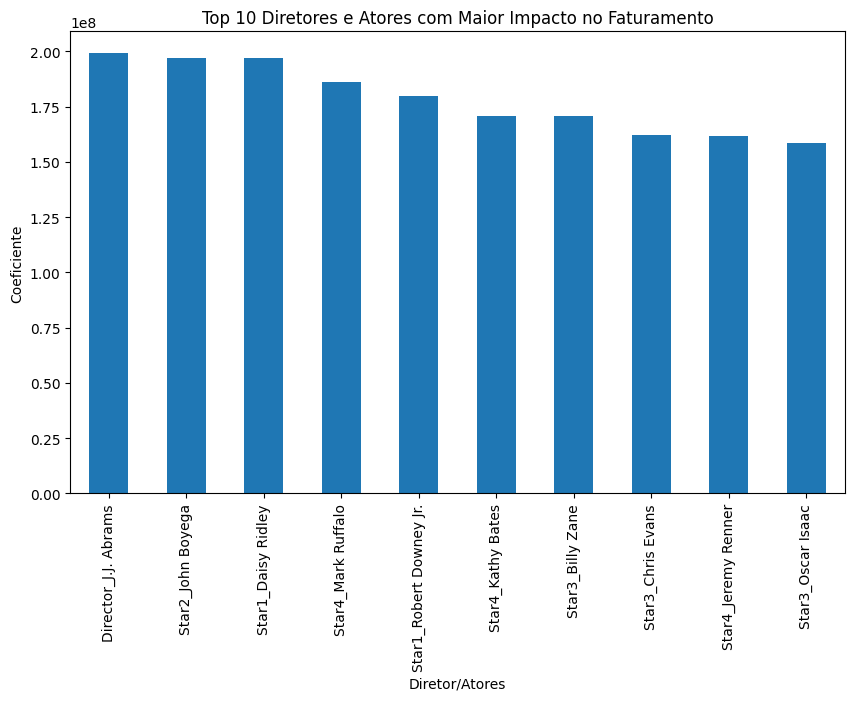

In [3]:
# Obter caminhos do arquivo csv das variáveis de ambiente
file_path = os.getenv('RAW_PATH')
file = f'{file_path}/desafio_indicium_imdb.csv'

# Preparando os dados
df_imdb, df_imdb_encoded = load_and_prepare_data(file)

# Treinando o modelo
model, X = train_model(df_imdb_encoded)

# Exibindo os coeficientes mais significativos
top_coef = print_top_coefficients(model, X)

# Plotando os coeficientes mais significativos
plot_top_coefficients(top_coef)


## Conclusão
Esse procedimento permite identificar quais diretores e atores estão mais fortemente associados a maiores faturamentos. A Regressão Linear ajudará a quantificar o impacto de cada um no faturamento, permitindo recomendações baseadas em dados sobre o elenco e os diretores que potencialmente podem aumentar o faturamento de um filme.

### Interpretando os Coeficientes do Modelo
Os coeficientes da regressão linear nos dirão quais diretores e atores têm maior impacto no faturamento. Diretores e atores com coeficientes maiores têm um impacto mais significativo.

**R² Score**: 
O valor de 0.48 para o coeficiente de determinação (R²) indica que o modelo explica aproximadamente 48% da variabilidade dos dados de faturamento dos filmes. Isso significa que o modelo tem uma capacidade moderada de fazer previsões, mas há espaço para melhorias.

**Impacto dos Diretores e Atores**: Os coeficientes listados mostram quanto cada diretor e ator específico contribui para o faturamento previsto do filme, mantendo todas as outras variáveis constantes. Alguns insights específicos incluem:

- **Director_J.J. Abrams**: Este diretor tem o maior coeficiente positivo, indicando que filmes dirigidos por J.J. Abrams tendem a ter um impacto significativo positivo no faturamento.

- **Star2_John Boyega** e **Star1_Daisy Ridley**: Os atores John Boyega e Daisy Ridley também têm coeficientes positivos elevados, sugerindo que filmes estrelados por eles estão associados a um aumento significativo no faturamento.

- **Star4_Mark Ruffalo**, **Star1_Robert Downey Jr.**, **Star4_Kathy Bates**, **Star3_Billy Zane**, **Star3_Chris Evans**, **Star4_Jeremy Renner**, **Star3_Oscar Isaac**: Outros atores também mostram coeficientes positivos, indicando que suas presenças nos filmes estão correlacionadas com um faturamento mais alto.

## Potencial de Ajuste do Modelo
Com base nos coeficientes observados, ajustes no elenco e na equipe de produção podem ser estratégias para aumentar o faturamento projetado de um filme. No entanto, é fundamental considerar também outros fatores não incluídos no modelo, como marketing, temporada de lançamento, críticas, entre outros.

Em resumo, esses insights fornecem uma visão inicial de como diretores e atores específicos podem influenciar o sucesso financeiro de um filme, de acordo com o modelo construído.

## Salvar o modelo
O modelo treinado será salvo em formato .pkl para uso futuro.

In [4]:
import joblib

In [ ]:
load_dotenv()

models_path = os.getenv('MODELS_PATH')
path_and_namefile = f'{models_path}/modelo_gross.pkl'

joblib.dump(model, path_and_namefile)